In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#1)Bringing dataset in desired form and defining ultravariables
my_data = pd.read_csv('linear_train.csv') #read the data
x = my_data.iloc[:,1:21]
X_train=x.to_numpy()
Y = my_data.iloc[:,21]
y_train=Y.to_numpy()
w_init=np.zeros(20)
b_init=0.0
print(X_train, y_train)

[[-2.84685568e+02  2.84567363e+02  1.84627063e+01 ... -1.20010842e+01
   8.39780551e+01  7.37317448e+02]
 [-4.28480005e+02  3.07240676e+02  2.26328973e+01 ...  1.80573704e+01
  -5.55216301e+01  7.75407458e+02]
 [-2.58008787e+01  2.37433758e+02 -4.67504670e-01 ...  7.06526251e+01
   3.02121708e+02  8.10402101e+02]
 ...
 [-2.54691431e+02  2.56793278e+02  2.31974534e+01 ... -2.30785214e+01
   1.88422643e+02  7.48559054e+02]
 [ 7.10054262e+02  2.57565009e+02 -1.63356012e+01 ...  1.52388356e+01
   8.95278167e+01  7.57012968e+02]
 [-2.69821407e+02  2.81097270e+02 -3.05824270e+01 ...  8.34763802e+00
   1.44270028e+02  7.32900535e+02]] [-218.01623149  154.14084898  394.84970115 ...   -3.44448897  445.35678148
 -500.9246807 ]


## The Next 4 Code snippets are only for trial executions.

In [3]:
# def predict_single_loop(x, w, b): 
#     """
#     single predict using linear regression
    
#     Args:
#       x (ndarray): Shape (n,) example with multiple features
#       w (ndarray): Shape (n,) model parameters    
#       b (scalar):  model parameter     
      
#     Returns:
#       p (scalar):  prediction
#     """
#     n = x.shape[0]
#     p = 0
#     for i in range(n):
#         p_i = x[i] * w[i]  
#         p = p + p_i         
#     p = p + b                
#     return p

In [4]:
# # get a row from our training data
# x_vec = X_train[0,:]
# print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# # make a prediction
# f_wb = predict_single_loop(x_vec, w_init, b_init)
# print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

In [5]:
# def predict(x, w, b): 
#     """
#     single predict using linear regression
#     Args:
#       x (ndarray): Shape (n,) example with multiple features
#       w (ndarray): Shape (n,) model parameters   
#       b (scalar):             model parameter 
      
#     Returns:
#       p (scalar):  prediction
#     """
#     p = np.dot(x, w) + b     
#     return p    

In [6]:
# # get a row from our training data
# x_vec = X_train[0,:]
# print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# # make a prediction
# f_wb = predict(x_vec,w_init, b_init)
# print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

# Multivariable Linear Regression Begins

In [7]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                         
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [8]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 30357.231980811557


In [9]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b ) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [10]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 0.36565073493050676
dj_dw at initial w,b: 
 [-2.03381654e+04 -1.80338019e+03 -2.74459030e+03 -2.28176415e-01
 -4.90207691e+02 -3.51295204e+02 -2.03791834e+03 -8.91797013e+02
 -5.91399059e+03 -2.07080351e+03 -1.11360871e+03 -1.07810045e+03
 -1.11400144e+02 -4.61916040e+04 -3.03576256e+03 -1.34565895e+03
 -3.72086247e+02 -9.50103456e+02 -4.58750869e+03 -8.94376012e+02]


In [11]:
 def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [12]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 500
alpha = 0.0000001
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)


Iteration    0: Cost 30097.03   
Iteration   50: Cost 25391.53   
Iteration  100: Cost 24409.10   
Iteration  150: Cost 23920.56   
Iteration  200: Cost 23613.39   
Iteration  250: Cost 23389.45   
Iteration  300: Cost 23206.24   
Iteration  350: Cost 23044.43   
Iteration  400: Cost 22894.98   
Iteration  450: Cost 22753.46   


In [13]:
y_final=[]
iter=[]
m=len(X_train)
for i in range(m):
  pred=np.dot(X_train[i], w_final)+b_final
  y_final.append(pred)
  iter.append(i)
#print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
#m,_ = X_train.shape
#for i in range(m):
 #   print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

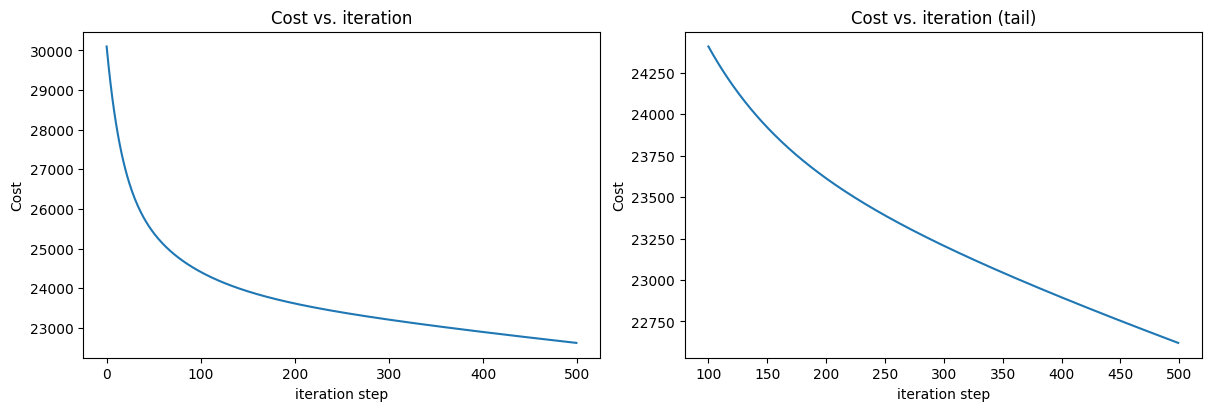

In [14]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

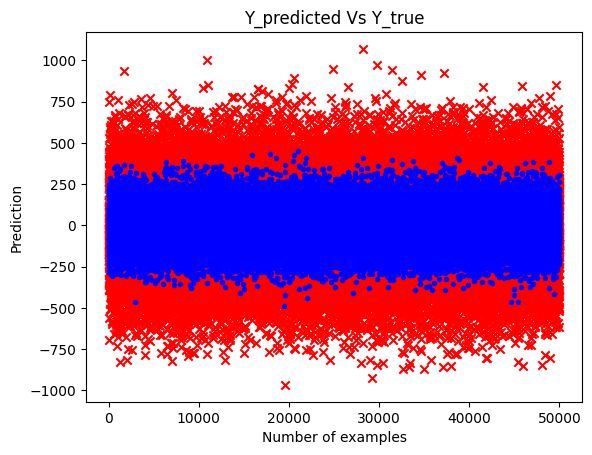

In [15]:
#Plotting predicted value of y and original value of y for every example
plt.scatter(iter,y_train, marker='x', c='r')
plt.scatter(iter,y_final, marker='.', c='b')
plt.title('Y_predicted Vs Y_true')
plt.ylabel('Prediction')
plt.xlabel('Number of examples')
plt.show()

#After feature scaling:

##Z Score normalisation


In [16]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [17]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

# run gradient descent 
w_norm, b_norm, J_his = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    0.3,200)
#Finding new yp
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

Iteration    0: Cost 16256.93   
Iteration   20: Cost  4769.78   
Iteration   40: Cost  4769.77   
Iteration   60: Cost  4769.77   
Iteration   80: Cost  4769.77   
Iteration  100: Cost  4769.77   
Iteration  120: Cost  4769.77   
Iteration  140: Cost  4769.77   
Iteration  160: Cost  4769.77   
Iteration  180: Cost  4769.77   


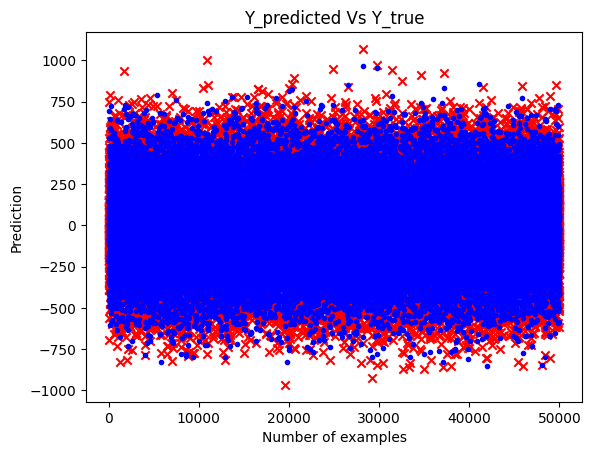

In [18]:
#Plotting new predicted value of y and original value of y
plt.scatter(iter,y_train, marker='x', c='r')
plt.scatter(iter,yp, marker='.', c='b')
plt.title('Y_predicted Vs Y_true')
plt.ylabel('Prediction')
plt.xlabel('Number of examples')
plt.show()

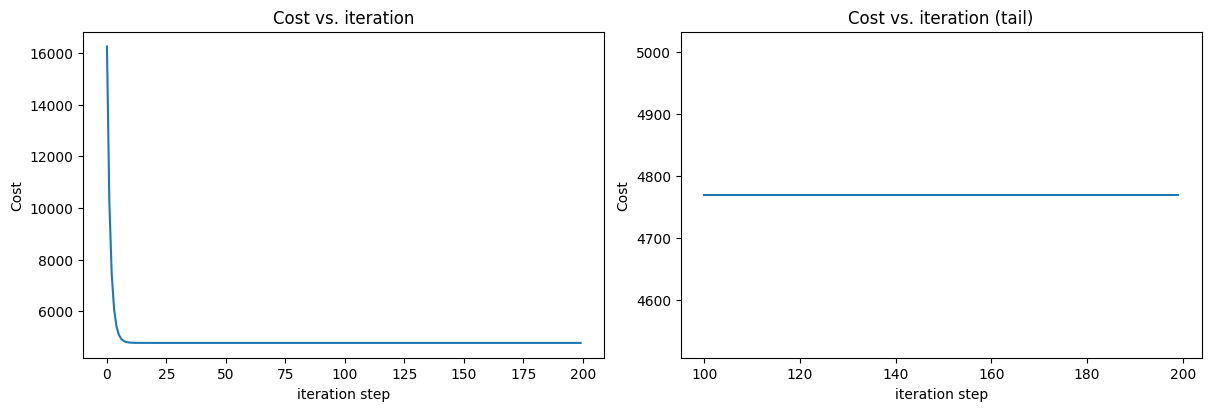

In [19]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_his)
ax2.plot(100 + np.arange(len(J_his[100:])), J_his[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

#Here goes the prediction


In [20]:
#1)Bringing dataset in desired form and defining ultravariables
my_dat = pd.read_csv('linear_test_data.csv') #read the data
xf = my_dat.iloc[:,1:21]
X_final=xf.to_numpy()

In [21]:
xf

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
0,146.790641,223.711806,-0.881371,-0.322721,-6.017133,47.178031,35.602711,-8.933317,95.386076,1510.000805,181.354189,-7.966671,46.040472,661.719092,-1952.914045,-5.495444,815.628857,4.880546,125.785551,800.204772
1,33.253653,285.935229,-3.352611,0.207565,27.865333,14.509716,39.281848,-4.864431,-595.380114,1565.287444,145.700293,31.679372,74.035799,479.886479,-1962.005676,32.900208,752.489552,30.748264,130.832421,736.119143
2,180.531799,208.420343,9.846188,0.056100,-58.428496,30.214517,66.251581,31.523355,-443.783229,1595.330946,106.941506,40.339842,-1.463878,-1192.020689,-2045.601034,78.949252,762.424938,-44.226575,7.939280,833.656738
3,-306.361163,255.513561,-11.604514,0.047190,-33.017575,46.154984,32.370151,-6.535854,-85.814496,1566.727450,145.675074,-31.362047,-18.208619,693.586581,-1951.320671,5.432544,773.038782,-38.283247,156.536709,768.081726
4,447.724328,260.956969,4.783504,0.125163,-5.139915,28.094844,93.076054,2.500579,-643.852271,1535.032028,127.333215,-19.122905,20.257857,-57.491322,-1988.874566,-14.716299,761.557824,27.932361,-236.948302,791.210566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-426.468515,291.551614,26.300724,0.130730,-4.872083,17.399959,70.618502,-4.460998,-694.240375,1574.510293,136.767406,16.565619,-2.386540,-44.753140,-1988.237657,-41.936271,817.753509,41.442877,272.775392,765.619881
19996,-19.681262,202.621592,31.471703,-0.078818,-41.499470,9.881198,54.743271,14.100738,-74.854393,1554.761176,153.252547,-10.708559,-50.903469,260.286893,-1972.985655,-13.514805,801.203063,29.506691,-38.517142,823.359433
19997,-208.062150,218.788471,-9.157649,0.030381,-0.065924,35.895902,105.127438,-84.720301,-453.066178,1578.243331,169.877357,-5.008809,19.220771,488.152892,-1961.592355,21.889645,802.930133,-5.941360,-67.821223,811.022376
19998,246.772616,229.348154,54.293518,0.232136,43.199142,6.230007,89.287017,2.239845,167.285540,1551.887888,152.720487,-3.644455,-34.817907,-772.011286,-2024.600564,14.743530,779.334314,67.348858,363.347336,748.942688


In [22]:
#Finding new yp
m = X_final.shape[0]
y_fin = np.zeros(m)
for i in range(m):
    y_fin[i] = np.dot(X_final[i], w_norm) + b_norm

In [23]:
print(y_fin)

[179801.06402948 158010.10610694  99372.79466444 ... 137119.63966369
 148038.35467847 151394.46999717]


In [24]:

from numpy import asarray
from numpy import savetxt
savetxt('linear outputs.csv', y_fin, delimiter=',', header='Labels')

In [26]:

corr_matrix = np.corrcoef(y_train, yp)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)





0.8428783227206162
